<a href="https://colab.research.google.com/github/DrPasidth/Thailand-IOT-4.0/blob/master/FaceRecognitionBlackpinkByKai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=24521073c870c4647b47e5bed5e3e1ab887220ff804263ae727662faa78f7da1
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [4]:
import face_recognition as face_rec

In [5]:
jennie_image = face_rec.load_image_file("/content/jennie1.png")

In [6]:
jisoo_image = face_rec.load_image_file("/content/jisoo1.png")

In [7]:
lisa_image = face_rec.load_image_file("/content/lisa1.png")

In [8]:
rose_image = face_rec.load_image_file("/content/rose1.png")

In [9]:
jennie_face_encoding = face_rec.face_encodings(jennie_image)[0]

In [10]:
jisoo_face_encoding = face_rec.face_encodings(jisoo_image)[0]

In [11]:
lisa_face_encoding = face_rec.face_encodings(lisa_image)[0]

In [12]:
rose_face_encoding = face_rec.face_encodings(rose_image)[0]

#Deploy

In [13]:
face_locations = []
face_encodings = []
face_names = []
face_percent = []

In [14]:
known_face_encodings = [jennie_face_encoding , jisoo_face_encoding,lisa_face_encoding,rose_face_encoding]

In [15]:
known_face_names = ["Jennie", "Jisoo","Lisa","Rose"]

In [28]:
blackpink_image = face_rec.load_image_file("/content/blackpink.jpg")

In [29]:
face_locations = face_rec.face_locations(blackpink_image)

In [30]:
print(face_locations)

[(142, 461, 178, 425), (98, 297, 134, 261), (372, 588, 415, 544)]


In [31]:
face_encodings = face_rec.face_encodings(blackpink_image, face_locations)

In [32]:
print(face_encodings)

[array([-0.05726583,  0.05345422,  0.11858963, -0.09187213, -0.08377136,
       -0.02430166, -0.13341868, -0.16517048,  0.13661981, -0.18956792,
        0.1648706 , -0.14271376, -0.17889687, -0.03866122, -0.09601049,
        0.26235366, -0.12865445, -0.16572174, -0.04146595,  0.02602747,
        0.01011889,  0.03921511,  0.03640515,  0.01770617, -0.0738701 ,
       -0.36427635, -0.1113791 , -0.02780258, -0.05885704, -0.06486195,
       -0.06496812,  0.08312532, -0.15759724,  0.0135999 ,  0.03405945,
        0.16087388,  0.02441081, -0.13599281,  0.10030246,  0.01702923,
       -0.27772084,  0.03990091,  0.08336964,  0.20852713,  0.15225196,
        0.00740687,  0.02036123, -0.15541224,  0.04912186, -0.17783865,
        0.01353955,  0.0668637 ,  0.02292736,  0.05826981,  0.03039797,
       -0.12680605,  0.0766083 ,  0.12394422, -0.15581474,  0.04791889,
        0.11750419, -0.09980111,  0.0052486 , -0.07226786,  0.21914232,
        0.15883133, -0.08925703, -0.2225557 ,  0.10945148, -0.1

In [33]:
for face_encoding in face_encodings:
  face_distances = face_rec.face_distance(known_face_encodings, face_encoding)
  best = np.argmin(face_distances)
  print(best)
  face_percent_value = 1-face_distances[best]
  print(face_percent_value)
  if face_percent_value >= 0.5:
    name = known_face_names[best]
    print(name)
    percent = round(face_percent_value*100,2)
    face_percent.append(percent)
  else:
    name = "UNKNOWN"
    face_percent.append(0)
  face_names.append(name)

3
0.65657661667282
Rose
2
0.5204614134670932
Lisa
0
0.6530260665204184
Jennie


In [34]:
print(face_percent)

[70.04, 62.7, 66.42, 58.36, 65.66, 52.05, 65.3]


In [35]:
print(face_names)

['Jisoo', 'Rose', 'Jennie', 'Lisa', 'Rose', 'Lisa', 'Jennie']


In [36]:
for (y1,x2,y2, x1), name in zip(face_locations, face_names):
  cv2.rectangle(blackpink_image, (x1,y1), (x2,y2), (0,255,0), 2)
  cv2.putText(blackpink_image, name, (x1, y1-6),cv2.FONT_HERSHEY_SIMPLEX , 0.6, (255,255,255), 1)

In [37]:
from google.colab.patches import cv2_imshow

In [38]:
blackpink_image = cv2.cvtColor(blackpink_image,cv2.COLOR_RGB2BGR)

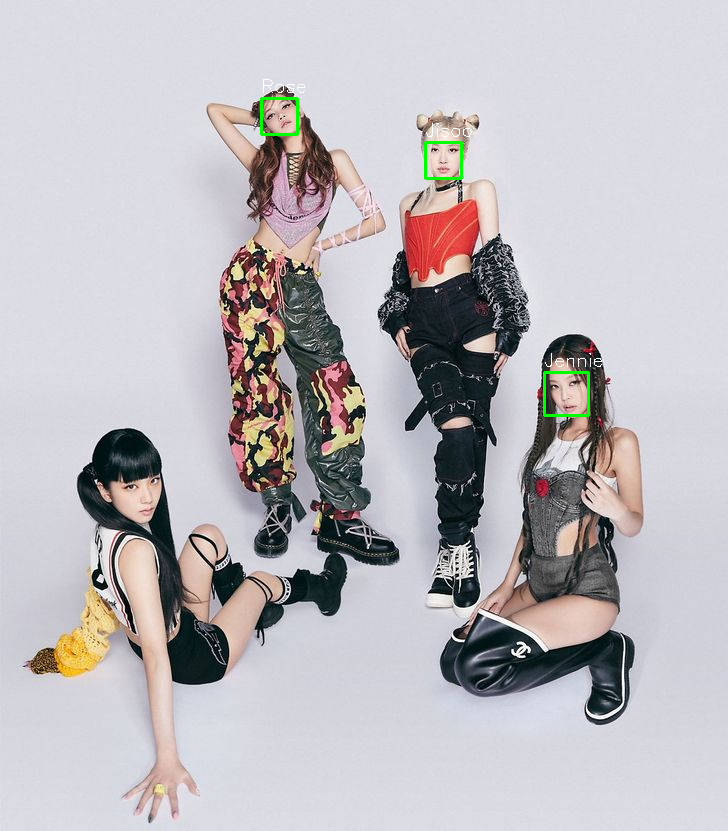

In [39]:
cv2_imshow(blackpink_image)